In [48]:
import os

import numpy as np

In [2]:
os.chdir('C:/Users/mohit/Downloads/Compressed/archive_2')
dir = os.getcwd()
dir

'C:\\Users\\mohit\\Downloads\\Compressed\\archive_2'

In [3]:
train_data = os.path.join('train')
test_data = os.path.join('test')

In [4]:
files = os.listdir(train_data)
print(files[:])

['angry', 'disgusted', 'fearful', 'happy', 'neutral', 'sad', 'surprised']


### CNN model for training 

In [5]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

In [6]:
#  mod = tf.keras.applications.MobileNetV2(
#     input_shape=(224,224,3),
#     alpha=1.0,
#     include_top=True,
#     weights="imagenet",
#     input_tensor=None,
#     pooling=None,
#     classes=1000,
#     classifier_activation="softmax")

## Tranfer Learning

In [7]:
mod = tf.keras.applications.InceptionV3(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [8]:
ip=mod.layers[0].input
op=mod.layers[-2].output


In [9]:
op

<KerasTensor: shape=(None, 2048) dtype=float32 (created by layer 'avg_pool')>

In [13]:
final_output=tf.keras.layers.Flatten()(op)
final_output=tf.keras.layers.Dense(1024)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(512)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(128)(final_output)
final_output=tf.keras.layers.Activation('relu')(final_output)
final_output=tf.keras.layers.Dropout(0.4)(final_output)
final_output=tf.keras.layers.Dense(7,activation='softmax')(final_output)

final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_3')>

In [14]:
model=tf.keras.Model(inputs =ip,outputs=final_output)

In [15]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [16]:
# model = tf.keras.models.Sequential([
    
#     op,
#     tf.keras.layers.Dense(1024 , activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(512 , activation='relu'),
#     tf.keras.layers.Dense(7 , activation='softmax')
    
# ])

In [17]:
# model.summary()

In [18]:
model.compile(loss = 'categorical_crossentropy',
             optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
             metrics=['accuracy'])

# Augmentation


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_gen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2, 
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_data_gen = train_gen.flow_from_directory(train_data , 
                                              target_size = (299,299),
                                              batch_size=10,
                                              class_mode="categorical")

test_gen = ImageDataGenerator(rescale = 1/255)
test_data_gen = test_gen.flow_from_directory(test_data ,
                                             target_size = (299,299),
                                             batch_size = 10,
                                             class_mode = "categorical")

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [46]:
categories = list(train_data_gen.class_indices.keys())
print(train_data_gen.class_indices)

{'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}


In [20]:
model_fiting = model.fit(train_data_gen ,steps_per_epoch=1000,epochs=50,validation_data=test_data_gen, verbose=2 ,batch_size =10 )

Epoch 1/50
1000/1000 - 242s - loss: 1.8031 - accuracy: 0.2562 - val_loss: 1.8371 - val_accuracy: 0.3908
Epoch 2/50
1000/1000 - 227s - loss: 1.5174 - accuracy: 0.4116 - val_loss: 1.3071 - val_accuracy: 0.5014
Epoch 3/50
1000/1000 - 230s - loss: 1.3755 - accuracy: 0.4786 - val_loss: 1.1883 - val_accuracy: 0.5599
Epoch 4/50
1000/1000 - 227s - loss: 1.3052 - accuracy: 0.5145 - val_loss: 1.1683 - val_accuracy: 0.5556
Epoch 5/50
1000/1000 - 227s - loss: 1.2400 - accuracy: 0.5416 - val_loss: 1.1024 - val_accuracy: 0.5809
Epoch 6/50
1000/1000 - 227s - loss: 1.2292 - accuracy: 0.5501 - val_loss: 1.0953 - val_accuracy: 0.5953
Epoch 7/50
1000/1000 - 227s - loss: 1.2014 - accuracy: 0.5583 - val_loss: 1.0569 - val_accuracy: 0.6092
Epoch 8/50
1000/1000 - 227s - loss: 1.1647 - accuracy: 0.5745 - val_loss: 1.1181 - val_accuracy: 0.5903
Epoch 9/50
1000/1000 - 227s - loss: 1.1267 - accuracy: 0.5899 - val_loss: 1.0283 - val_accuracy: 0.6205
Epoch 10/50
1000/1000 - 227s - loss: 1.1111 - accuracy: 0.5969 -

In [47]:
model_fiting.evaluate(test_data_gen , batch_size=1000)

718/718 [==============================] - 43s 60ms/step - loss: 0.9422 - accuracy: 0.6783


[0.9422315359115601, 0.6783226728439331]

In [ ]:
acc = model_fiting.history["accuracy"]
validation_acc = model_fiting.history["val_accuracy"]
print(acc)
print(validation_acc)

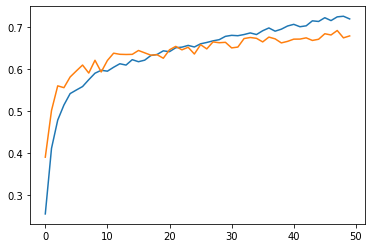

In [22]:
import matplotlib.pyplot as plt
epochs=range(len(acc))
plt.plot(epochs ,acc )
plt.plot(epochs, validation_acc)
plt.show()

In [23]:
# best fit till now
# epoch_step = 800
# RMS alpha = 0.001
# 1024 , 512 , 128 , 0.3drop
#71%

In [30]:
model.save('model.h5')

In [28]:
model.save('C:/model')

INFO:tensorflow:Assets written to: C:/model\assets


In [7]:
model_fiting = tf.keras.models.load_model('model.h5')

In [8]:
result = model_fiting.predict(test_data_gen)

In [9]:
result

array([[6.25343442e-01, 8.72614887e-03, 1.14753611e-01, ...,
        5.05642779e-02, 7.26648942e-02, 4.72369380e-02],
       [1.06659674e-04, 9.72099912e-09, 3.99828859e-05, ...,
        2.26688781e-03, 2.17965382e-04, 2.66957322e-05],
       [2.19638320e-03, 6.51647980e-08, 5.27466880e-03, ...,
        9.68573749e-01, 1.90057196e-02, 3.98681404e-05],
       ...,
       [1.96141355e-05, 3.95126043e-10, 5.92890956e-06, ...,
        2.01875737e-04, 1.94780605e-05, 5.66271638e-06],
       [1.31533444e-01, 5.60114917e-04, 3.45779099e-02, ...,
        6.97863460e-01, 7.90628493e-02, 4.05977340e-03],
       [2.28969708e-01, 3.08185117e-03, 1.06567845e-01, ...,
        3.50446433e-01, 2.94877857e-01, 8.28719977e-03]], dtype=float32)

### for uploading image 

In [42]:
# from tensorflow.keras.utils import load_img , img_to_array
# uploading_file = os.listdir('new')

# for fn in uploading_file:
#   path = "C:/Users/mohit/Downloads/Compressed/archive_2/new/"+fn
#   image = load_img(path , target_size=(299,299))
#   x = img_to_array(image)
#   x = x/225
#   x = np.expand_dims(x , axis=0)

#   images = np.vstack([x])
#   pred_res = model_fiting.predict(images , batch_size=10)
#   print(pred_res[0].max())
#   print(pred_res[0])


0.97988266
[9.7988266e-01 2.0258871e-05 6.2723696e-04 2.0896805e-06 2.5243408e-04
 1.9213578e-02 1.7630822e-06]
0.5333528
[0.5333528  0.00310162 0.38657537 0.03847228 0.00313019 0.01442823
 0.0209395 ]
0.47441414
[0.20428438 0.0015399  0.08251197 0.0078913  0.47441414 0.2234445
 0.0059138 ]
